In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


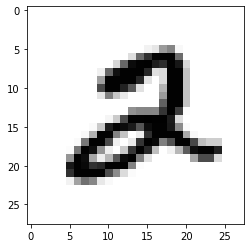

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5], cmap=plt.cm.binary)

In [ ]:
print(y_train[5])

2


In [ ]:
# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
#Before hot encoding
print(y_test[0])

print(y_train[0])

print(y_train.shape)

print(y_test.shape)


7
5
(60000,)
(10000,)


In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
#After Hot encoding
print(Y_test[0])
print(Y_train[0])
print(Y_train.shape)
print(Y_test.shape)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100,input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))


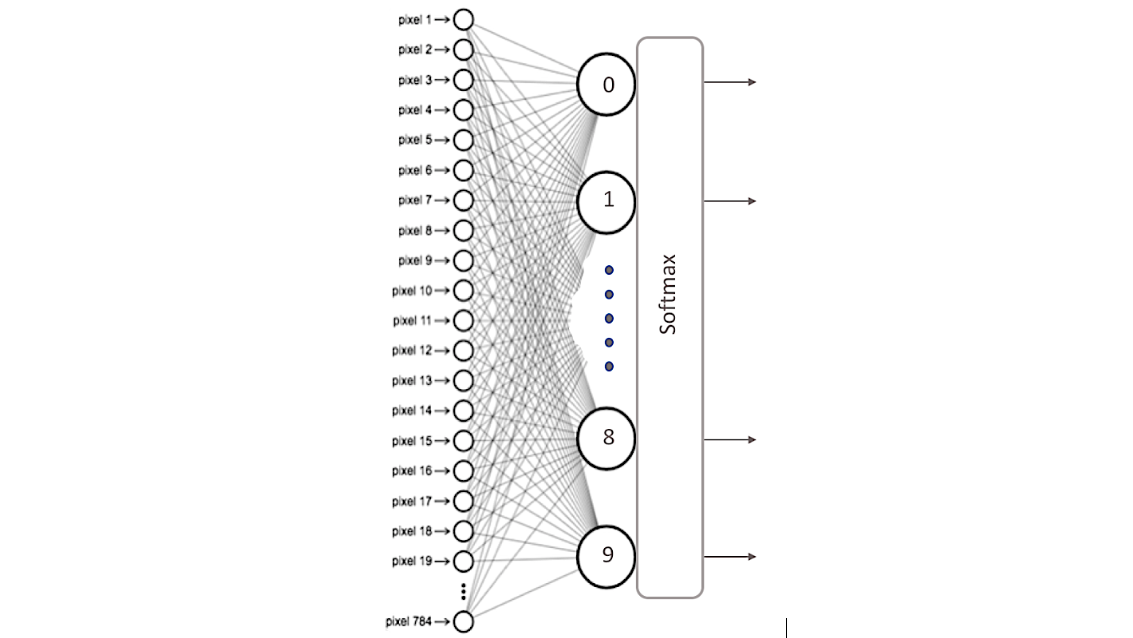

In [ ]:

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=100, epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0296 - accuracy: 0.9918
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0242 - accuracy: 0.9934
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0211 - accuracy: 0.9942
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0180 - accuracy: 0.9955
Epoch 5/10
600/600 [============================

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("TEST ACCURACY",round(test_acc,3))
print("TEST LOSS",round(test_loss,3))

313/313 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9777
TEST ACCURACY 0.978
TEST LOSS 0.084


For further reading
https://towardsdatascience.com/deep-learning-for-beginners-practical-guide-with-python-and-keras-d295bfca4487